# Installing Anaconda distribution

To install the Anaconda distribution, follow these steps:

1. **Download Anaconda:** Go to the Anaconda website (https://www.anaconda.com/products/individual) and download the appropriate Anaconda distribution for your operating system (Windows, macOS, or Linux). Make sure to choose the Python 3.x version.

2. **Run the Installer:** Once the download is complete, locate the installer file and run it. If you're on Windows, it will be an executable file (.exe), and on macOS and Linux, it will be a script file (.sh).

3. **Follow the Installation Wizard:** The installer will launch an installation wizard. Follow the on-screen instructions to proceed.

4. **Read and Accept the License Agreement:** You will be presented with the Anaconda license agreement. Read it carefully, and if you agree, select the checkbox to accept the terms and conditions.

5. **Choose the Installation Location:** Choose the installation location for Anaconda on your system. You can keep the default location or choose a different one.

6. **Choose Install for:** Select "Just Me" if you want to install Anaconda only for your user account, or select "All Users" if you want to install it for all users on the system. It's recommended to choose "Just Me" unless you have a specific requirement.

7. **Select Add Anaconda to PATH (Recommended):** It's recommended to check the box to add Anaconda to your system's PATH environment variable. This allows you to use Anaconda from the command line or terminal without specifying the full path.

8. **Select Register Anaconda as the System Python (Recommended):** It's recommended to check this box to make Anaconda the default Python distribution on your system.

9. **Installation Complete:** Once you've made your selections, click the "Install" button to begin the installation process.

10. **Wait for Installation:** The installer will extract the files and install Anaconda on your system. This may take a few minutes.

11. **Completing the Anaconda Installation:** Once the installation is complete, you will see a "Thank you for installing Anaconda" message. You can choose to learn more about Anaconda Navigator, Anaconda Cloud, or exit the installer.

12. **Verify the Installation:** Open a new terminal or command prompt window and type `conda --version`. If Anaconda is installed correctly, it will display the version number of the conda package manager.

Congratulations! You have successfully installed the Anaconda distribution on your system. You can now use Anaconda to manage Python packages, create virtual environments, and run data analysis tools like Jupyter Notebook.

- After successful installation search Jupyter notebook in window's seach bar and open it.
- Download this file and upload using upload button.
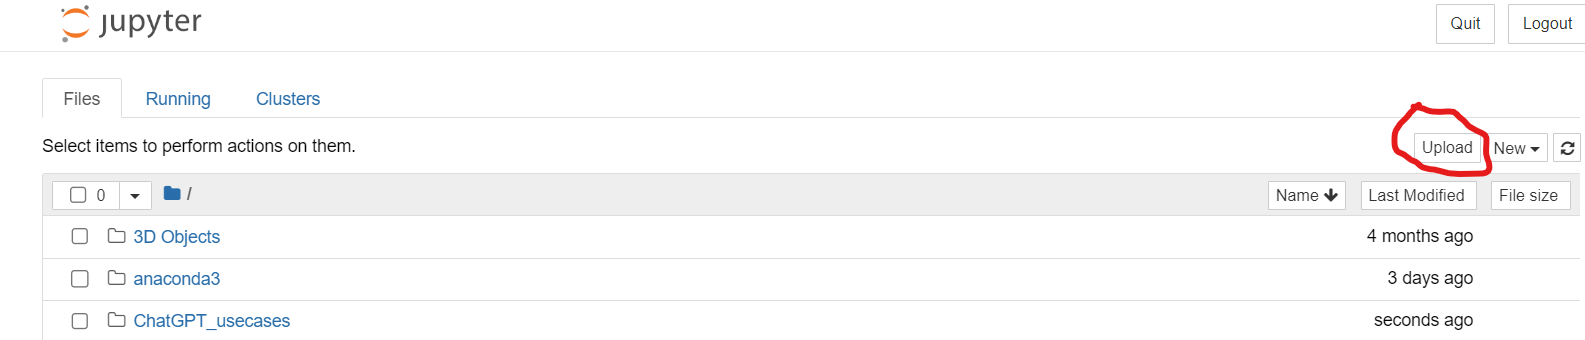

# Steps to generate API Key

To get a ChatGPT API key, you need to create an account on the OpenAI website and then generate a key. Here are the steps involved:<br>

Go to the OpenAI website and click on the "Sign up" button.<br>
Enter your email address and password, or sign up using your Google or Microsoft account.<br>
Verify your email address.<br>
Click on API.<br>
Click on your profile picture in the top right corner of the screen.<br>
Click on View API keys.<br>
Click on the "Create new secret key" button.<br>
Copy your API key and keep it safe. You will need it to access the ChatGPT API.<br>

In [1]:
#Install below libraries
!pip install openai
!pip install PyPDF2
!pip install fpdf

  Using cached pypdf2-3.0.1-py3-none-any.whl (232 kB)
  Using cached fpdf-1.7.2.tar.gz (39 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=9c82e99552de8a1e2327cc344373538212802aad07f90b4cd2ee36743497cec1
  Stored in directory: c:\users\manis\appdata\local\pip\cache\wheels\bc\6c\e7\c239668efef980927985e629d58674079552a9de5ec3aebfd8
Successfully built fpdf


# Setting up environment and API Key to use chatGPT

In [16]:
import openai
import re
import os
import PyPDF2
import time
from fpdf import FPDF

openai.api_key = '<<api-key>>'

# OpenAI Model Utilities

# `get_completion`

The `get_completion` function uses the OpenAI API to generate a completion based on a given prompt. Here's a breakdown of how the function works:

1. The function takes two parameters: `prompt` (the input text for the model) and `model` (the model to use for generating the completion). By default, the function uses the `gpt-3.5-turbo` model.

2. It initializes a `messages` list with a single dictionary element. The dictionary contains two keys: `"role"` and `"content"`. The role is set to `"user"` to indicate that the message is from the user, and the content is set to the provided `prompt`.

3. The `openai.ChatCompletion.create()` method is called to generate the completion. It takes several parameters:
   - `model`: The model to use for generating the completion.
   - `messages`: The list of messages for the conversation. In this case, it contains only the user's prompt.
   - `temperature`: This parameter controls the randomness of the model's output. A temperature of `0` means the output will be deterministic and focused, while a higher value like `1.0` introduces more randomness.

4. The function retrieves the completion text from the API response. It accesses the first element of the `choices` list in the response and then extracts the content of the message.

5. Finally, the function returns the generated completion text.

You can use this `get_completion` function to interact with the OpenAI API and generate responses or completions based on a given prompt.

In [17]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

# `get_completion_large`

The `get_completion_large` function is designed to facilitate large-scale text completion using the OpenAI API. It takes several parameters: `messages`, `model`, `temperature`, and `max_tokens`.

Here's a breakdown of how the function works:

1. The `messages` parameter is a list of message objects. Each message object has two properties: `role` and `content`. The `role` can be 'system', 'user', or 'assistant', and the `content` contains the actual text of the message.

2. The `model` parameter specifies the language model to use. By default, it is set to "gpt-3.5-turbo", which is one of the models provided by OpenAI.

3. The `temperature` parameter controls the randomness of the generated text. A higher value like 1.0 makes the output more random, while a lower value like 0.2 makes it more deterministic.

4. The `max_tokens` parameter sets the maximum number of tokens in the generated response. Tokens are chunks of text used by the language model for processing.

5. The function initializes a `continuation_token` variable to keep track of the continuation of the conversation.

6. Inside a while loop, the function makes an API call to `openai.Completion.create` with the provided parameters, including the `messages` list and the `continuation_token`.

7. The API response contains a `choices` list, which contains the generated message. The function extracts the `content` from the first choice and adds it to the `messages` list with the 'system' role.

8. The `continuation_token` is updated with the finish reason from the API response.

9. If the finish reason is 'stop', indicating that the completion process is complete, the loop breaks.

10. Finally, the function returns the content of the generated message from the `response.choices[0].message["content"]`.

This function can be used to interact with the OpenAI API for large-scale text completion tasks, where the conversation continues until a stop condition is met.

In [18]:
def get_completion_large(messages, 
                        model="gpt-3.5-turbo", 
                        temperature=0, 
                        max_tokens=1000):
    continuation_token = None

    while True:
        response = openai.Completion.create(
            model=model,
            messages=messages,
            temperature=temperature, 
            max_tokens=max_tokens,
            continuation_token=continuation_token
        )

        chunk = response.choices[0].message['content']
        messages.append({'role': 'system', 'content': chunk})

        continuation_token = response['choices'][0]['finish_reason']

        if continuation_token == 'stop':
            break

    return response.choices[0].message["content"]

# `get_completion_from_messages`

The `get_completion_from_messages` function is a custom function that interacts with the OpenAI API Chat Completion endpoint to generate a completion based on a list of messages. Here is a breakdown of how it works:

1. The function takes the following parameters:
   - `messages`: A list of message objects. Each message object contains a "role" (either "system", "user", or "assistant") and "content" (the actual text of the message).
   - `model`: The model to use for generating the completion. The default value is set to "gpt-3.5-turbo", which is a high-performance language model provided by OpenAI.
   - `temperature`: The temperature value determines the randomness of the generated output. A higher value like 1.0 makes the output more diverse and creative, while a lower value like 0.2 makes it more focused and deterministic. The default value is set to 0, meaning the output will be deterministic.
   - `max_tokens`: The maximum number of tokens allowed in the generated completion. Tokens can be thought of as units of text (e.g., words or characters). The default value is set to 500 tokens.

2. The function calls the `openai.ChatCompletion.create()` method, which sends a request to the OpenAI API's Chat Completion endpoint. It passes the required parameters:
   - `model`: The model to use for completion, as specified in the function argument.
   - `messages`: The list of messages, as specified in the function argument.
   - `temperature`: The temperature value, as specified in the function argument.
   - `max_tokens`: The maximum number of tokens, as specified in the function argument.

3. The response from the API call is stored in the `response` variable.

4. The function extracts the content of the completion from the `response` object. It accesses the `choices` attribute of the response, which contains a list of completions. Since we specified `max_tokens=500` and we want only the first completion, it retrieves `response.choices[0]`. The completion's content is accessed using `response.choices[0].message["content"]`.

5. Finally, the content of the completion is returned as the output of the function.

This function allows you to easily generate completions from a list of messages using the OpenAI API, abstracting away the complexity of making the API call and handling the response.

In [19]:
def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
        max_tokens=max_tokens,
    )
    return response.choices[0].message["content"]

# Functions for fundamental analysis

# `preprocess_text`

The function `preprocess_text` is a simple text preprocessing function that performs a series of operations to clean and normalize the input text. Here's a breakdown of how it works:

1. Lowercasing the text: The function converts all the characters in the text to lowercase. This is done to ensure consistency and avoid treating the same word as different based on its case. For example, "Hello" and "hello" will be considered the same after lowercasing.

2. Removing special characters: The function uses regular expressions (`re`) to remove any non-alphanumeric characters from the text. Special characters such as punctuation marks, symbols, and other non-alphabetic or non-numeric characters are removed. This step helps in removing noise and focusing on the actual words in the text.

3. Replacing multiple spaces: The function replaces multiple consecutive spaces with a single space. This step is useful to handle cases where there are multiple spaces between words, ensuring that words are separated by only one space.

The purpose of this preprocessing function is to clean the input text and make it more suitable for further text analysis or natural language processing tasks. By lowercasing the text, removing special characters, and normalizing spaces, the function helps standardize the text data and improve the accuracy of subsequent analysis or modeling.

In [20]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    return text

In [21]:
def load_screener_data():

    for i in range(0, len(screener_tabs)):
        tabname = screener_tabs[i]
        f = open(f'{company_data}/{tabname}.txt')
        data = f.read()
        f.close()
        screener_data[tabname] = data


In [22]:
def company_info_analysis():
    file = f'{company_data}/company_info.txt'
    data = 'No company info'
    if os.path.isfile(file):
        f = open(file)
        data = f.read()
        f.close()
    print('Analyzing company_info data...') 
    system_message = f'As a financial analyst for equity markets, perform an evaluation of the company based on the inputs provided. The input is enclosed within {delimiter}.\
        You must to the analysis in the following steps.\
        Step 8: Prepare a short description of the companys business, factories, plants and operations in general.\
        Step 9: Prepare shareholding trend and status, separetly, if shareholding data is provided. \
        Step 10: Perpare a separate detailed summary of concall data if provided. \
        Step 11: If credit rating data is provided, list out positive and negative points separately. \
        Give your analysis in as detailed manner as possible, however summarize it to limit to max_tokens = 2000 '
    user_message = f'{delimiter}{data}{delimiter}'
    messages =  [  
        {'role':'system', 
        'content': system_message},    
        {'role':'user', 
        'content': f"{delimiter}{user_message}{delimiter}"},  
        ] 
    response = get_completion_from_messages(messages,max_tokens=2000)
    return response

In [23]:
def fin_statement_analysis():
    print('Analyzing screener data...')
    system_message = f'As a financial analyst for equity markets, you need to perform an evaluation of the company based on the inputs provided. Some of these inputs will be standard financial data and some will be unstructured. \
            The input data will be encloded with {delimiter} You must to the analysis in the following steps. \
            Step 1:{delimiter} Perform a financial analysis of the company from stock market investing perspective from its annual income statement quarterly income statment \
                balance sheet and cashflow statement. Each will be provided to you enclosed as {delimiter}income_statement:{delimiter} {delimiter}balance_sheet{delimiter} and so on. \
                Step 2: Using the ratio_analysis statement analyze the working capital cycle. Step 3: Perform a Du-Pont analysis using the above data. Step 4: Perform profitibility analysis of this financial data\
                    Step 5: Provide trend analysis and competitive advantages of the company based on given financial data. Step 6: Check pricing power of this company? \
                    Step 6: Detect and report any red flags about the company from the data \
                    Step 7: Report preparation/ Take special care. As an analyst perform these analysis and prepare a report that is very detailed but summarize it to limit to  max_tokens=2000.'

    msg = ''
    for key,val in screener_data.items():
        msg = f'{delimiter}{key}:{val}{delimiter}'
    user_message = f'{delimiter}{msg}{delimiter}'
    messages =  [  
        {'role':'system', 
        'content': system_message},    
        {'role':'user', 
        'content': f"{delimiter}{user_message}{delimiter}"},  
        ] 
    response = ''
    response = get_completion_from_messages(messages,max_tokens=2000)
    
    return response

In [24]:
def text_to_pdf(input_file, output_file):
    # Create a new PDF object
    pdf = FPDF()

    # Set the font and font size
    pdf.set_font("Arial", size=12)

    # Open the input text file for reading with the correct encoding
    with open(input_file, "r", encoding="latin-1") as file:
        # Read the contents of the file
        text = file.read()

    # Add a page and set the left/top margins
    pdf.add_page()
    pdf.set_left_margin(10)
    pdf.set_top_margin(10)

    # Write the text into the PDF
    pdf.multi_cell(0, 10, text)

    # Save the PDF to the output file
    pdf.output(output_file)

def convert_to_four_lists(lst):
    result = []
    for i in range(0, len(lst), 4):
        result.append(lst[i:i+4])
    return result


def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = pdf_reader.pages
        page_count = len(pdf_reader.pages)
        l = list(range(2,int(page_count)))
        converted_lists = convert_to_four_lists(l)
        lo = []
        for li in converted_lists:
            text = ""
            for page_num in li:
                page = pdf_reader.pages[page_num]
                text += page.extract_text()
            lo.append(text)
    return lo

def append_to_file(file_path, data):
    with open(file_path, 'a') as file:
        file.write(data)
        file.write('\n') 

def analyze_concall_data(concall_file_path, analysis_file_path):
    extracted_text = extract_text_from_pdf(concall_file_path)
    system_message = f'As a financial analyst for equity markets, you need to do the analysis of concall from the given input data. Some of these inputs will be standard financial data and some will be unstructured. \
            The input data will be encloded with {delimiter} You must to the analysis in the following steps. \
            Step 1:{delimiter} Provide the highlights in terms of capex and reinvestment, future growth prospects of growth from the conversation'
    for text in extracted_text:
        user_message = f'{delimiter}{text[:4000]}{delimiter}'
        messages =  [ {'role':'system',  'content': system_message}, {'role':'user', 'content': f"{delimiter}{user_message}{delimiter}"},]
        response = get_completion_from_messages(messages,max_tokens=500)
        append_to_file(analysis_file_path, response)
        print(response)
        time.sleep(60)
        
    return "File analysed successfully"
    

# Prepare Data

- Go to screener.com and download the excel in Technofunda format for the company you want to analyse.
- Create a folder with the name of company symbol.
- create seperate text files in that folder for each tab in excel like income_statement, income_statement_quarterly, balance_sheet, cashflow_statement, ratio_analysis, DuPont_Analysis, company_info

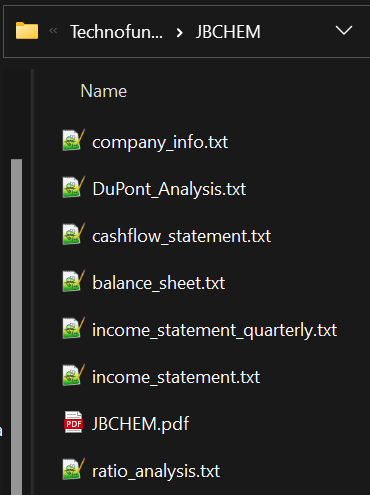

- Compny_info can be created using the information available on screener site.

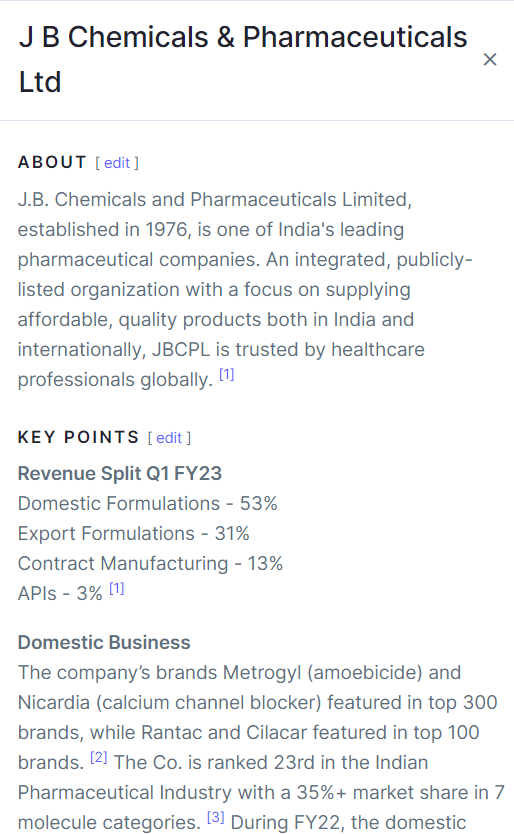

- Download the latest concall pdf and put it in same folder.


In [27]:
screener_xls_data = {}
delimiter = "####"

company_data = input('Enter the data file location(replace "\\" with "/") eg. D:/Technofunda Hackathon/JBCHEM :')
company_name = input("Enter company Name: ")
concall_file_name = input("Enter concall pdf file name: ")
concall_analysis_file_name = f"{company_name}_concall_analysis"

screener_tabs = ['income_statement','income_statement_quarterly', 'balance_sheet', 'cashflow_statement', 'ratio_analysis','DuPont_Analysis']
screener_data = {}

load_screener_data()

#Financial statement analysis from screener data
fin_screener_analysis = ''
fin_screener_analysis = fin_statement_analysis()
# print(fin_screener_analysis)
with open(f'{company_data}/financial_analysis.txt', 'w', encoding='utf-8') as file:
    file.write(fin_screener_analysis)

#Perform company info analysis from data from internet and elsewhere
co_info_analysis = ''
co_info_analysis = company_info_analysis()
with open(f'{company_data}/company_info_analysis.txt', 'w', encoding='utf-8') as file:
    file.write(co_info_analysis)

time.sleep(60)    
print("analysing concall data...")
analyze_concall_data(f'{company_data}/{concall_file_name}',f'{company_data}/{concall_analysis_file_name}.txt')
text_to_pdf(f'{company_data}/{concall_analysis_file_name}.txt',f'{company_data}/{concall_analysis_file_name}.pdf')

Enter the data file location(replace "\" with "/") eg. D:/Technofunda Hackathon/JBCHEM :D:/Technofunda Hackathon/JBCHEM
Enter company Name: JBCHEM
Enter concall pdf file name: JBCHEM.pdf
Analyzing screener data...
Analyzing company_info data...
analysing concall data...
Highlights:
- Reported a revenue growth of 22% to INR762 crore in Q4 and crossed a milestone of INR3,000-plus crore sales for the financial year.
- Domestic business - formulation business grew at 29% and the revenues increased to INR380 crore in the quarter, whereas annually it stood for INR1,640 crore for the current financial year with a growth of 38%.
- Big brands got bigger, and the acquired portfolio also ramped up.
- Per person productivity improved to INR6.2 lakhs in the year, up from INR5.4 lakhs in FY '22.
- Azmarda, a very potent addition to the cardiac portfolio, emerged among the top 300 brands in IPM as per IQVIA MAT March 2023, and now ranks at the number of 261 as per IQVIA MAT March data.
- Across big b